# Generating Sample Data from Distributions
Then treating data as if they were samples of real data

* https://github.com/ijmbarr/causalgraphicalmodels
* https://github.com/ijmbarr/causalgraphicalmodels/blob/master/notebooks/cgm-examples.ipynb
* https://en.wikipedia.org/wiki/Vehicular_metrics

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 8)
# mpl.rcParams["figure.dpi"] = dpi
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15)

font_size=15
title_font_size=25

In [4]:
import pandas as pd
print(pd.__version__)

1.4.3


In [5]:
from scipy.stats import skewnorm

In [6]:
import seaborn as sns

In [7]:
# !pip install causalgraphicalmodels

In [8]:
# https://github.com/ijmbarr/causalgraphicalmodels
# https://github.com/ijmbarr/causalgraphicalmodels/blob/master/notebooks/cgm-examples.ipynb
from causalgraphicalmodels import StructuralCausalModel

In [9]:
# https://en.wikipedia.org/wiki/Vehicular_metrics

braking_distance_mean = 40
braking_distance_std = 5
power_mean = 100
power_std = 50

car_safety_model = StructuralCausalModel({
    "emergency_breaking": lambda n_samples: np.random.binomial(1, p=0.60, size=n_samples), 
    "braking_distance": lambda n_samples: np.random.normal(loc=braking_distance_mean, scale=braking_distance_std, size=n_samples),
    "power": lambda n_samples: skewnorm.rvs(a=2, loc=power_mean, scale=power_std, size=n_samples),
    "car_safety": \
        lambda emergency_breaking, braking_distance, power, n_samples: \
            np.random.normal(loc=emergency_breaking - \
                             # having a breaking distance below average is negative, so we have to subtract
                             (braking_distance - braking_distance_mean) / braking_distance_std - \
                             # all deviation from good amount of power is negative
                             abs(power - power_mean) / power_std, \
                             scale=0.1)
})

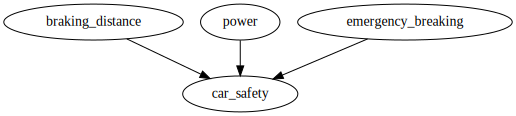

In [10]:
car_safety_model.cgm.draw()

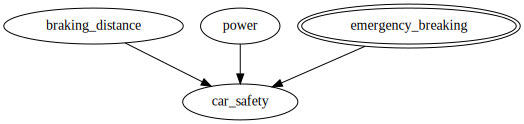

In [11]:
car_safety_model_do_emergency_breaking = car_safety_model.do("emergency_breaking")

car_safety_model_do_emergency_breaking.cgm.draw()

In [12]:
car_safety_model.cgm.get_distribution()

'P(emergency_breaking)P(braking_distance)P(power)P(car_safety|emergency_breaking,braking_distance,power)'

In [13]:
n_samples=10_000
# data = car_safety_model_do_emergency_breaking.sample(n_samples=n_samples, 
#                                                      set_values={"emergency_breaking": np.ones(n_samples)})
data = car_safety_model.sample(n_samples=n_samples)
data.head()

,emergency_breaking,braking_distance,power,car_safety
0,0,43.247332,223.526473,-3.134089
1,0,39.077681,192.674723,-1.662882
2,0,34.916226,166.964172,-0.333840
3,0,41.831106,159.723472,-1.725656
4,0,43.146521,103.415313,-0.620033


In [14]:
braking_distance = 31.983544

In [15]:
(braking_distance - braking_distance_mean) / braking_distance_std

-1.6032912000000004

In [16]:
power = 50

In [17]:
abs(power - power_mean) / power_std

1.0

In [18]:
data.describe()

,emergency_breaking,braking_distance,power,car_safety
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.586800,40.052654,135.861398,-0.224786
std,0.492433,4.983273,34.774830,1.268002
min,0.000000,21.340182,31.846649,-6.205688
25%,0.000000,36.708774,111.826049,-1.068333
50%,1.000000,40.023282,133.278679,-0.194418
75%,1.000000,43.436801,157.346667,0.639011
max,1.000000,59.600538,299.886034,4.570877


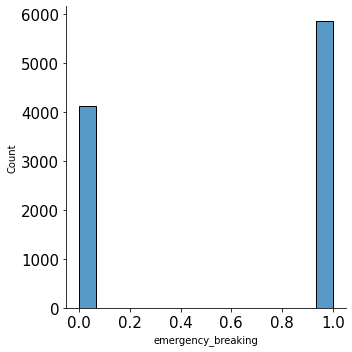

In [19]:
sns.displot(data["emergency_breaking"]);

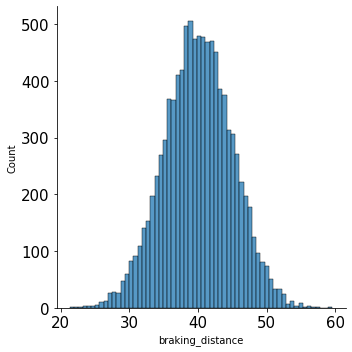

In [20]:
sns.displot(data["braking_distance"]);

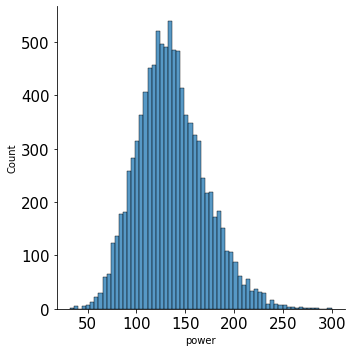

In [21]:
sns.displot(data["power"]);

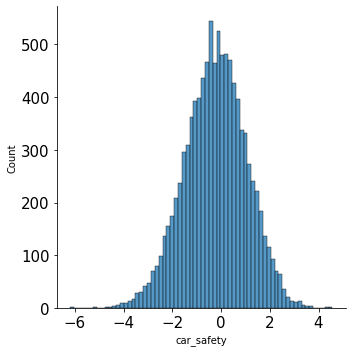

In [22]:
sns.displot(data["car_safety"]);

In [23]:
# sns.kdeplot?

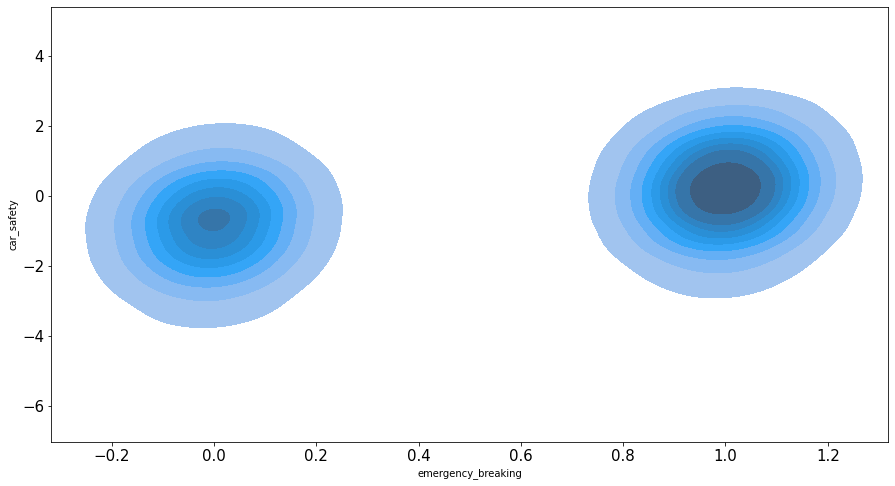

In [24]:
sns.kdeplot(
    data=data["emergency_breaking"],
    data2=data["car_safety"],
    fill=True
);

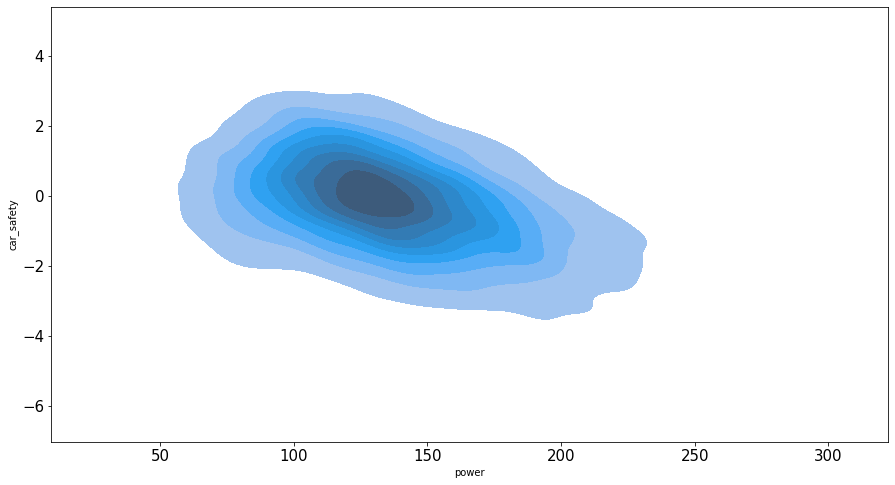

In [25]:
sns.kdeplot(
    data=data["power"],
    data2=data["car_safety"],
    fill=True
);

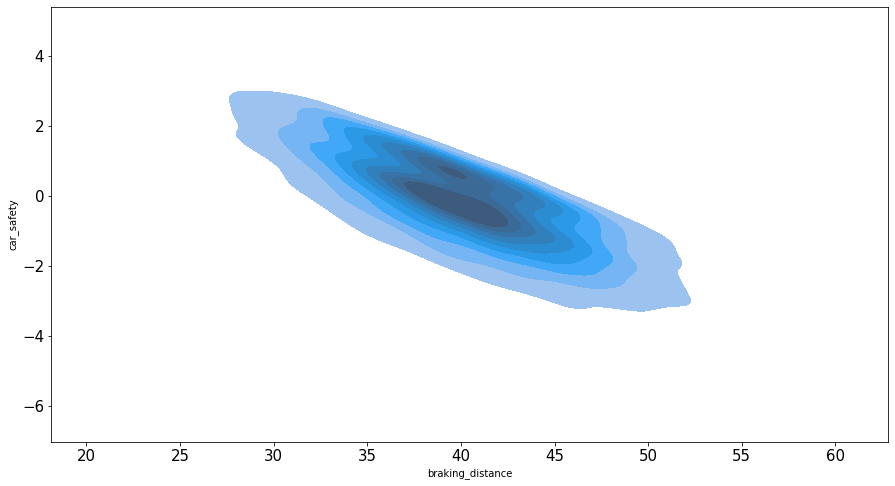

In [26]:
sns.kdeplot(
    data=data["braking_distance"],
    data2=data["car_safety"],
    fill=True
);

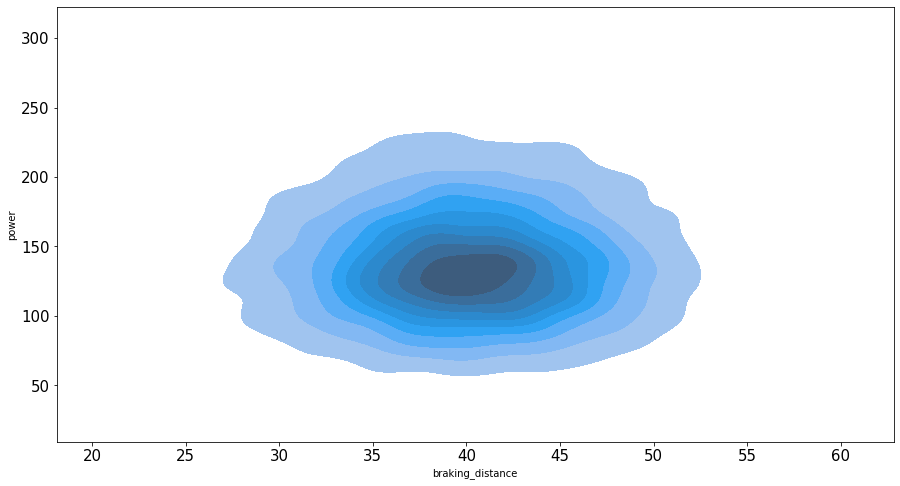

In [27]:
sns.kdeplot(
    data=data["braking_distance"],
    data2=data["power"],
    fill=True
);

In [28]:
from scipy.stats import pearsonr


In [29]:
# pearsonr?

In [30]:
r, p_value = pearsonr(data['braking_distance'], data['power'])
# The p-value roughly indicates the probability of an uncorrelated system
# producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets.
r, p_value

(-0.00021940455989234633, 0.9824976409583047)

In [31]:
r, p_value = pearsonr(data['braking_distance'], data['car_safety'])
r, p_value

(-0.788462948554706, 0.0)

In [32]:
r, p_value = pearsonr(data['power'], data['car_safety'])
r, p_value

(-0.43608898922687556, 0.0)

# Driver's ability

age distribution: https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Bevoelkerung/Bevoelkerungsstand/Tabellen/bevoelkerung-altersgruppen-deutschland.html

(16, 100, 34.9758, 13.417138829124488, 10000)

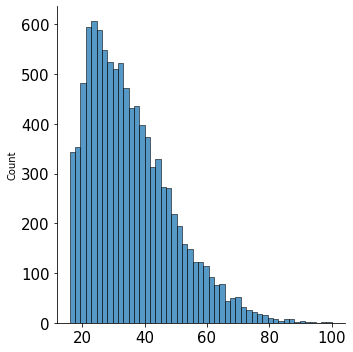

In [33]:
age_mean = 18
age_std = 22

x = skewnorm.rvs(a=8, loc=age_mean, scale=age_std, size=n_samples)
# hard clip leaves us with non constant amout of samples
# x = x[(x > 16) & (x < 100)] 
x = np.clip(x, a_min=16, a_max=100)
sns.displot(x);
x = x.astype(int)
age_skewed_mean = x.mean()
age_skewed_std = x.std()

x.min(), x.max(), age_skewed_mean, age_skewed_std, len(x)

In [34]:
driver_ability_model = StructuralCausalModel({
    "training": lambda n_samples: np.random.binomial(1, p=0.20, size=n_samples), 
    "age": lambda n_samples: skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples),
    "driver_ability": \
        lambda training, age, n_samples: 
            np.random.normal(loc=training - \
                             # all deviation from good age is negative
                             # using unskwed mean makes this a bit more balanaced
                             abs(age - age_skewed_mean) / age_std, \
                             scale=0.1)})

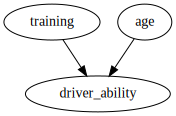

In [35]:
driver_ability_model.cgm.draw()

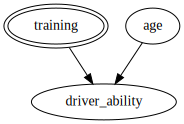

In [36]:
driver_ability_model_with_training = driver_ability_model.do("training")

driver_ability_model_with_training.cgm.draw()

In [37]:
driver_ability_model.cgm.get_distribution()

'P(training)P(age)P(driver_ability|training,age)'

In [38]:
n_samples=10_000
data = driver_ability_model.sample(n_samples=n_samples)
data.head()

,training,age,driver_ability
0,0,25.922400,-0.383469
1,0,17.411127,-0.724045
2,0,58.173516,-1.099569
3,0,52.433500,-0.933494
4,1,20.736250,0.184468


In [39]:
age = 80

In [40]:
# abs(age - age_skewed_mean) / age_skewed_std
# more balanced
abs(age - age_skewed_mean) / age_std

2.0465545454545455

In [41]:
data.describe()

,training,age,driver_ability
count,10000.00000,10000.000000,10000.000000
mean,0.20040,35.650128,-0.282297
std,0.40032,13.385878,0.552757
min,0.00000,14.619532,-3.282940
25%,0.00000,25.162628,-0.606299
50%,0.00000,33.001113,-0.324778
75%,0.00000,43.376962,-0.048984
max,1.00000,107.281412,1.232332


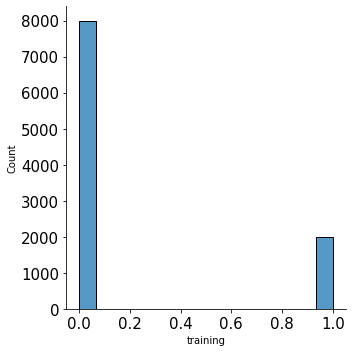

In [42]:
sns.displot(data["training"]);

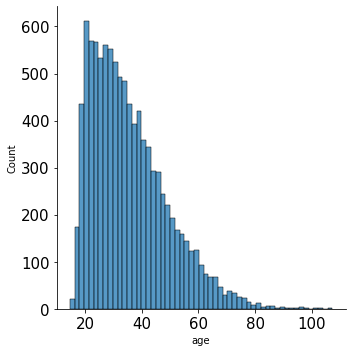

In [43]:
sns.displot(data["age"]);

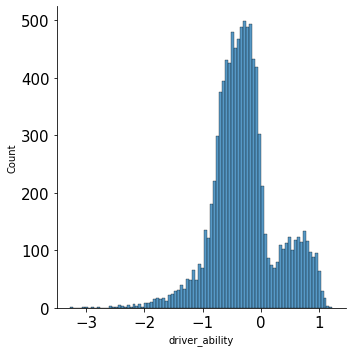

In [44]:
sns.displot(data["driver_ability"]);

In [45]:
# sns.kdeplot?

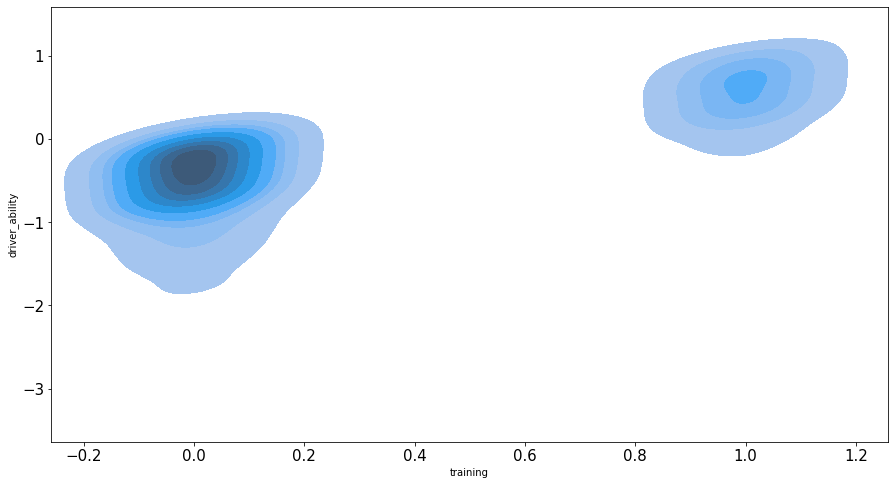

In [46]:
sns.kdeplot(
    data=data["training"],
    data2=data["driver_ability"],
    fill=True
);

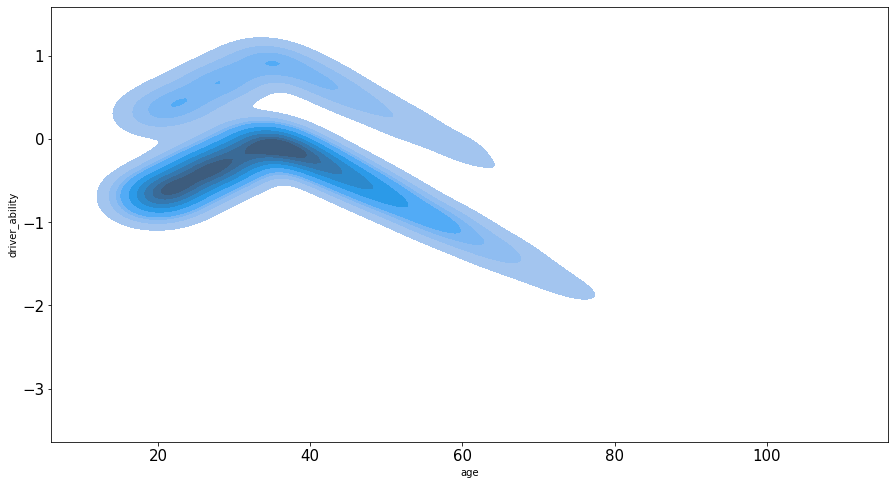

In [47]:
sns.kdeplot(
    data=data["age"],
    data2=data["driver_ability"],
    fill=True
);

In [48]:
r, p_value = pearsonr(data['age'], data['driver_ability'])
r, p_value

(-0.34189494416731026, 3.093556064618669e-272)

In [49]:
r, p_value = pearsonr(data['training'], data['driver_ability'])
r, p_value

(0.7193377312054746, 0.0)

In [50]:
r, p_value = pearsonr(data['training'], data['age'])
r, p_value

(0.0017772253877822212, 0.8589582220104505)

# Combined risk model

In [51]:
from sklearn.preprocessing import normalize

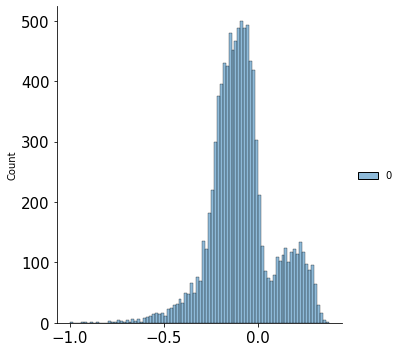

In [52]:
ability = normalize(data['driver_ability'].values.reshape(-1, 1), axis=0, norm='max')
sns.displot(ability);

(8.665527823326684, 130.12142359801217, 44.20083995186426, 15.706036100718995)

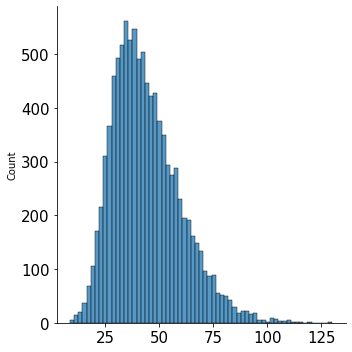

In [53]:
miles_mean = 25
miles_std = 25

x = skewnorm.rvs(a=4, loc=miles_mean, scale=miles_std, size=n_samples)
sns.displot(x);
miles_skewed_mean = x.mean()
miles_skewed_std = x.std()

x.min(), x.max(), miles_skewed_mean, miles_skewed_std

In [54]:
risk_model = StructuralCausalModel({
    "ability": lambda n_samples: driver_ability_model.sample(n_samples=n_samples)['driver_ability'], 
    "safety": lambda n_samples: car_safety_model.sample(n_samples=n_samples)['car_safety'],
    "miles": lambda n_samples: skewnorm.rvs(a=4, loc=miles_mean, scale=miles_std, size=n_samples),
    "risk": \
        lambda ability, safety, miles, n_samples:
                # negative score is high risk
             - np.random.normal(loc=ability + \
                             safety -
                             # all deviation from good miles is negative
                             abs(miles - miles_mean) / miles_std, \
                             scale=0.1)})

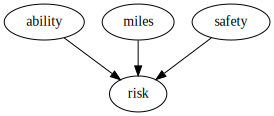

In [55]:
risk_model.cgm.draw()

In [56]:
n_samples=10_000
data = risk_model.sample(n_samples=n_samples)
data.head()

,ability,safety,miles,risk
0,0.708079,0.648529,67.304506,0.212555
1,-0.580652,-0.981863,52.282120,2.516765
2,0.909556,-1.463283,39.687729,1.194779
3,-0.786653,-0.707548,37.595105,1.960927
4,0.729937,-3.056800,28.427316,2.482120


In [57]:
data.describe()

,ability,safety,miles,risk
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.279697,-0.170973,44.429997,1.249885
std,0.559221,1.262521,15.746937,1.508292
min,-3.027532,-5.462609,9.755912,-4.561130
25%,-0.599892,-1.014488,32.917650,0.204649
50%,-0.319312,-0.147198,41.966906,1.220673
75%,-0.042262,0.693942,53.501885,2.263071
max,1.232888,3.876197,127.990594,7.120003


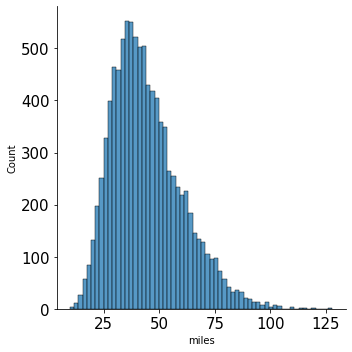

In [58]:
sns.displot(data["miles"]);

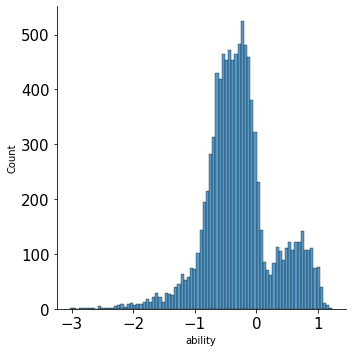

In [59]:
sns.displot(data["ability"]);

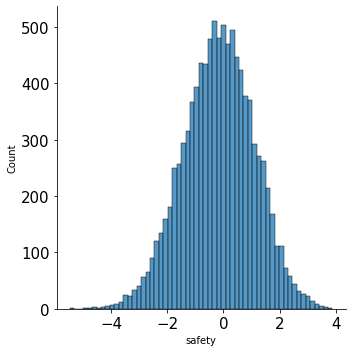

In [60]:
sns.displot(data["safety"]);

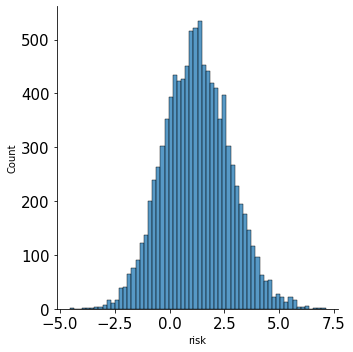

In [61]:
sns.displot(data["risk"]);

In [62]:
# sns.kdeplot?

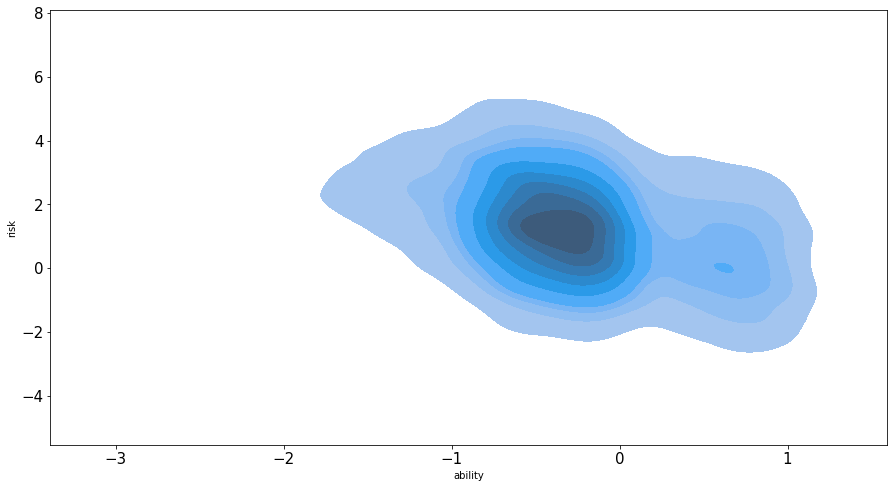

In [63]:
sns.kdeplot(
    data=data["ability"],
    data2=data["risk"],
    fill=True
);

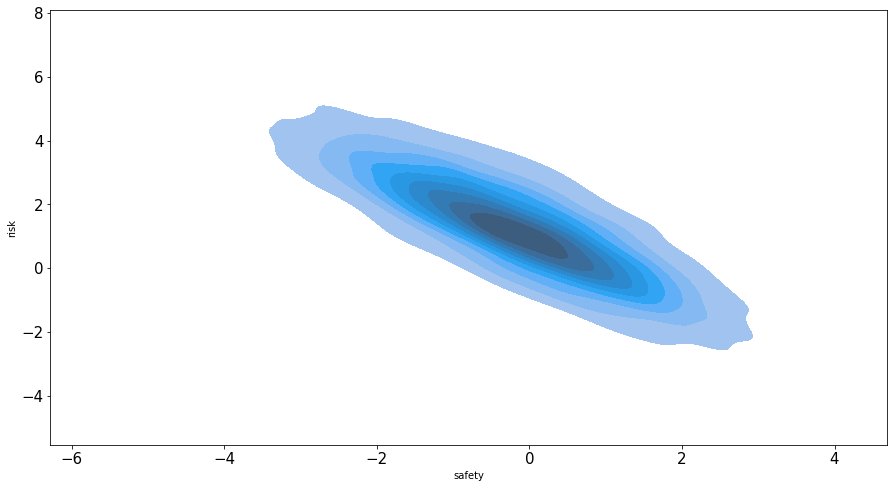

In [64]:
sns.kdeplot(
    data=data["safety"],
    data2=data["risk"],
    fill=True
);

In [65]:
r, p_value = pearsonr(data['safety'], data['risk'])
r, p_value

(-0.8341608236492855, 0.0)

In [66]:
r, p_value = pearsonr(data['ability'], data['risk'])
r, p_value

(-0.3652856079195699, 2.5736379672e-313)

In [67]:
r, p_value = pearsonr(data['ability'], data['safety'])
r, p_value

(-0.01109677786890525, 0.267182972856496)

# Decomposed combined

(16, 100, 35.0322, 13.505375343173547, 10000)

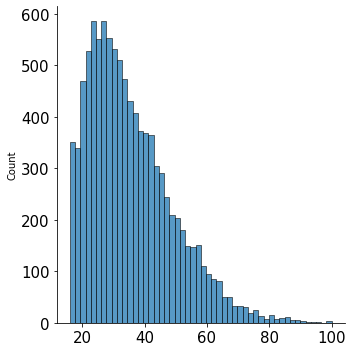

In [68]:
age_mean = 18
age_std = 22

x = skewnorm.rvs(a=8, loc=age_mean, scale=age_std, size=n_samples)
# hard clip leaves us with non constant amout of samples
# x = x[(x > 16) & (x < 100)] 
x = np.clip(x, a_min=16, a_max=100)
sns.displot(x);
x = x.astype(int)
age_skewed_mean = x.mean()
age_skewed_std = x.std()

x.min(), x.max(), age_skewed_mean, age_skewed_std, len(x)

In [69]:
# can be changed over time in favor of the car
# driver is overall more important than car
driver_weight = 4

risk_model = StructuralCausalModel({
    "training": lambda n_samples: np.random.binomial(1, p=0.20, size=n_samples), 
#     "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100).astype(int),
    "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100),
    "driver_ability": \
        lambda training, age, n_samples: 
            np.random.normal(loc=training - \
                             # all deviation from good age is negative
                             # using unskwed mean makes this a bit more balanaced
                             abs(age - age_skewed_mean) / age_std, \
                             scale=0.1),
    "emergency_breaking": lambda n_samples: np.random.binomial(1, p=0.40, size=n_samples), 
    "braking_distance": lambda n_samples: np.random.normal(loc=braking_distance_mean, scale=braking_distance_std, size=n_samples),
    "power": lambda n_samples: skewnorm.rvs(a=2, loc=power_mean, scale=power_std, size=n_samples),
    "car_safety": \
        lambda emergency_breaking, braking_distance, power, n_samples: \
            np.random.normal(loc=emergency_breaking - \
                             # having a breaking distance below average is negative, so we have to subtract
                             (braking_distance - braking_distance_mean) / braking_distance_std - \
                             # all deviation from good amount of power is negative
                             abs(power - power_mean) / power_std, \
                             scale=0.1),
    "miles": lambda n_samples: skewnorm.rvs(a=4, loc=miles_mean, scale=miles_std, size=n_samples),
    "risk": \
        lambda driver_ability, car_safety, miles, n_samples:
             # negative score is high risk
             - np.random.normal(loc=\
                             driver_ability * driver_weight\
                             + car_safety
                             # all deviation from good miles is negative
                             - abs(miles - miles_mean) / miles_std, \
                             scale=0.1)})

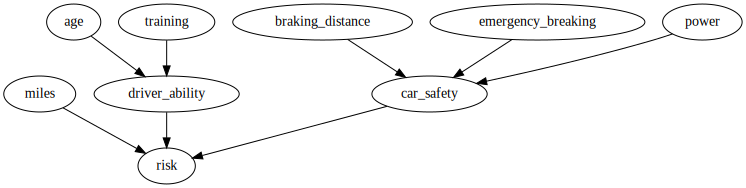

In [70]:
risk_model.cgm.draw()

In [71]:
# n_samples=10_000
n_samples=1_500
np.random.seed(42)
data = risk_model.sample(n_samples=n_samples)
data.head()

,training,age,emergency_breaking,braking_distance,power,miles,driver_ability,car_safety,risk
0,0,74.493138,1,38.264068,122.527184,28.744236,-1.754215,0.803182,6.289652
1,1,67.074261,0,43.854011,115.367900,51.519687,-0.420627,-0.958545,3.766323
2,0,47.691471,0,34.730823,126.498658,52.320498,-0.659732,0.670282,3.056356
3,0,55.429717,0,42.139072,125.629252,54.241036,-1.043881,-0.821925,6.252412
4,0,41.088408,1,31.490489,241.447458,41.182762,-0.247124,-0.077803,1.780452


In [72]:
data.describe()

,training,age,emergency_breaking,braking_distance,power,miles,driver_ability,car_safety,risk
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.207333,35.243806,0.384667,39.728535,137.524885,43.766704,-0.264908,-0.396552,2.225890
std,0.405532,13.193059,0.486679,5.108156,36.527189,15.274232,0.544815,1.273974,2.575662
min,0.000000,16.000000,0.000000,25.502431,31.956980,8.911590,-2.368605,-4.755363,-6.226609
25%,0.000000,24.971581,0.000000,36.261921,112.369662,32.597446,-0.592255,-1.242621,0.578324
50%,0.000000,32.511926,0.000000,39.697162,134.053456,41.697948,-0.311749,-0.377730,2.331871
75%,0.000000,43.043168,1.000000,43.284010,160.117914,52.330167,-0.019683,0.495051,3.807458
max,1.000000,88.456666,1.000000,55.491497,281.197004,106.746630,1.167305,3.637374,13.338471


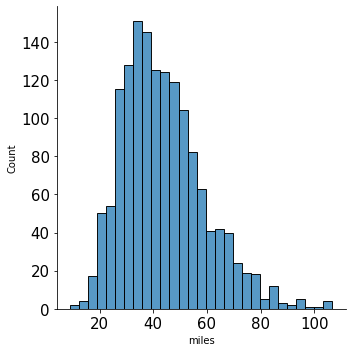

In [73]:
sns.displot(data["miles"]);

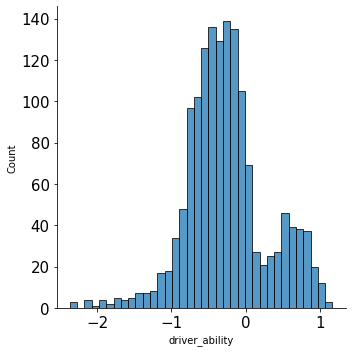

In [74]:
sns.displot(data["driver_ability"]);

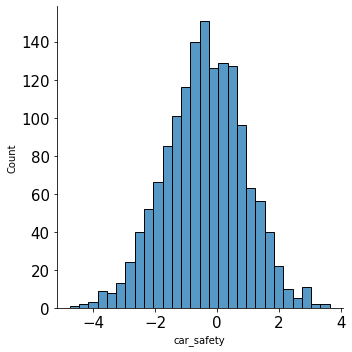

In [75]:
sns.displot(data["car_safety"]);

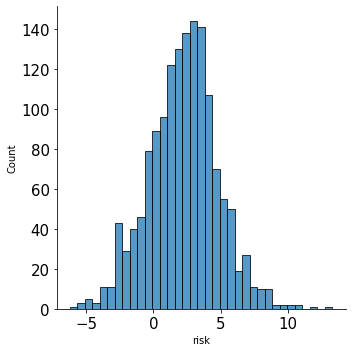

In [76]:
sns.displot(data["risk"]);

In [77]:
# sns.kdeplot?

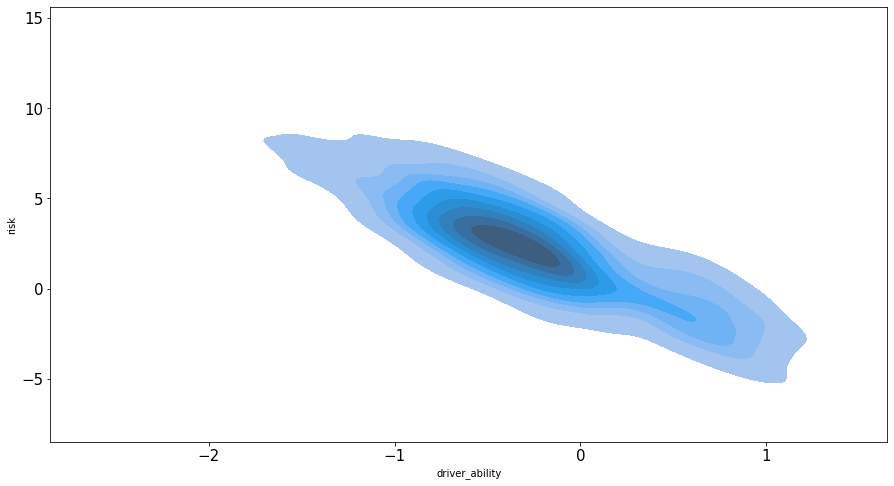

In [78]:
sns.kdeplot(
    data=data["driver_ability"],
    data2=data["risk"],
    fill=True
);

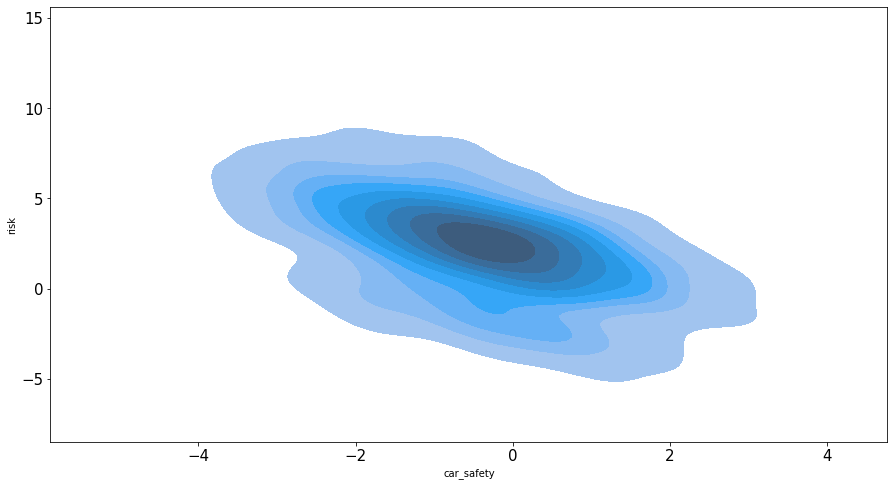

In [79]:
sns.kdeplot(
    data=data["car_safety"],
    data2=data["risk"],
    fill=True
);

In [80]:
r, p_value = pearsonr(data['car_safety'], data['risk'])
r, p_value

(-0.49510851757812896, 1.392269518974954e-93)

In [81]:
r, p_value = pearsonr(data['driver_ability'], data['risk'])
r, p_value

(-0.8362204924104754, 0.0)

In [82]:
r, p_value = pearsonr(data['driver_ability'], data['car_safety'])
r, p_value

(-0.0028966535831526966, 0.9107491752027388)

In [83]:
data.head()

,training,age,emergency_breaking,braking_distance,power,miles,driver_ability,car_safety,risk
0,0,74.493138,1,38.264068,122.527184,28.744236,-1.754215,0.803182,6.289652
1,1,67.074261,0,43.854011,115.367900,51.519687,-0.420627,-0.958545,3.766323
2,0,47.691471,0,34.730823,126.498658,52.320498,-0.659732,0.670282,3.056356
3,0,55.429717,0,42.139072,125.629252,54.241036,-1.043881,-0.821925,6.252412
4,0,41.088408,1,31.490489,241.447458,41.182762,-0.247124,-0.077803,1.780452


In [84]:
GREEN = 2
YELLOW = 1
RED = 0

In [85]:
features = ['training', 'age', 'emergency_breaking', 'braking_distance', 'power', 'miles', 'risk']

In [86]:
# preprocessed_data = data[['driver_ability', 'car_safety', 'miles', 'risk']]
preprocessed_data = data[features]
# preprocessed_data = data.copy()
preprocessed_data['risk'] = normalize(preprocessed_data['risk'].values.reshape(-1, 1), axis=0, norm='max')
preprocessed_data['group_name'] = 'medium'
preprocessed_data['group'] = YELLOW
preprocessed_data.head()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group_name,group
0,0,74.493138,1,38.264068,122.527184,28.744236,0.471542,medium,1
1,1,67.074261,0,43.854011,115.367900,51.519687,0.282365,medium,1
2,0,47.691471,0,34.730823,126.498658,52.320498,0.229138,medium,1
3,0,55.429717,0,42.139072,125.629252,54.241036,0.468750,medium,1
4,0,41.088408,1,31.490489,241.447458,41.182762,0.133482,medium,1


In [87]:
preprocessed_data.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.0
mean,0.207333,35.243806,0.384667,39.728535,137.524885,43.766704,0.166877,1.0
std,0.405532,13.193059,0.486679,5.108156,36.527189,15.274232,0.193100,0.0
min,0.000000,16.000000,0.000000,25.502431,31.956980,8.911590,-0.466816,1.0
25%,0.000000,24.971581,0.000000,36.261921,112.369662,32.597446,0.043358,1.0
50%,0.000000,32.511926,0.000000,39.697162,134.053456,41.697948,0.174823,1.0
75%,0.000000,43.043168,1.000000,43.284010,160.117914,52.330167,0.285449,1.0
max,1.000000,88.456666,1.000000,55.491497,281.197004,106.746630,1.000000,1.0


In [88]:
# balanced? imbalanced?
low_risk_threshold = preprocessed_data['risk'].quantile(.45)
# low_risk_threshold = preprocessed_data['risk'].quantile(.4)
# low_risk_threshold = preprocessed_data['risk'].quantile(.35)
# low_risk_threshold = preprocessed_data['risk'].quantile(.3333)
# low_risk_threshold = preprocessed_data['risk'].quantile(.50)
low_risk_threshold

0.14999670458007242

In [89]:
# high_risk_threshold = preprocessed_data['risk'].quantile(.6)
# high_risk_threshold = preprocessed_data['risk'].quantile(.65)
# high_risk_threshold = preprocessed_data['risk'].quantile(.6666)
high_risk_threshold = preprocessed_data['risk'].quantile(.55)
# high_risk_threshold = preprocessed_data['risk'].quantile(.75)
high_risk_threshold

0.1973255361472741

In [90]:
preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] < low_risk_threshold, 'low', preprocessed_data['group_name'])

In [91]:
preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] > high_risk_threshold, 'high', preprocessed_data['group_name'])

In [92]:
np.unique(preprocessed_data['group_name'], return_counts=True)

(array(['high', 'low', 'medium'], dtype=object), array([675, 675, 150]))

In [93]:
preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'low', GREEN, preprocessed_data['group'])

In [94]:
preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'high', RED, preprocessed_data['group'])

In [95]:
preprocessed_data.head(10)

,training,age,emergency_breaking,braking_distance,power,miles,risk,group_name,group
0,0,74.493138,1,38.264068,122.527184,28.744236,0.471542,high,0
1,1,67.074261,0,43.854011,115.367900,51.519687,0.282365,high,0
2,0,47.691471,0,34.730823,126.498658,52.320498,0.229138,high,0
3,0,55.429717,0,42.139072,125.629252,54.241036,0.468750,high,0
4,0,41.088408,1,31.490489,241.447458,41.182762,0.133482,low,2
5,0,69.693872,0,37.193310,167.797457,55.167091,0.592217,high,0
6,0,49.558664,0,38.352553,164.678203,34.774203,0.236389,high,0
7,1,28.690422,0,48.374298,126.981076,33.556179,-0.027469,low,2
8,0,31.817048,0,38.625988,95.699767,29.853749,-0.000380,low,2
9,0,37.597146,1,28.993783,128.365608,39.237379,-0.082793,low,2


In [96]:
preprocessed_data.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000
mean,0.207333,35.243806,0.384667,39.728535,137.524885,43.766704,0.166877,1.000
std,0.405532,13.193059,0.486679,5.108156,36.527189,15.274232,0.193100,0.949
min,0.000000,16.000000,0.000000,25.502431,31.956980,8.911590,-0.466816,0.000
25%,0.000000,24.971581,0.000000,36.261921,112.369662,32.597446,0.043358,0.000
50%,0.000000,32.511926,0.000000,39.697162,134.053456,41.697948,0.174823,1.000
75%,0.000000,43.043168,1.000000,43.284010,160.117914,52.330167,0.285449,2.000
max,1.000000,88.456666,1.000000,55.491497,281.197004,106.746630,1.000000,2.000


In [97]:
labels = ["High Risk", "Medium Risk", "Low Risk"]
markers = ['v', 'd', '^']
# colors = ['#FF8080', '#FFFF80', '#8080FF']
colors = ['#FF0000', '#FFFF00', '#0000FF']

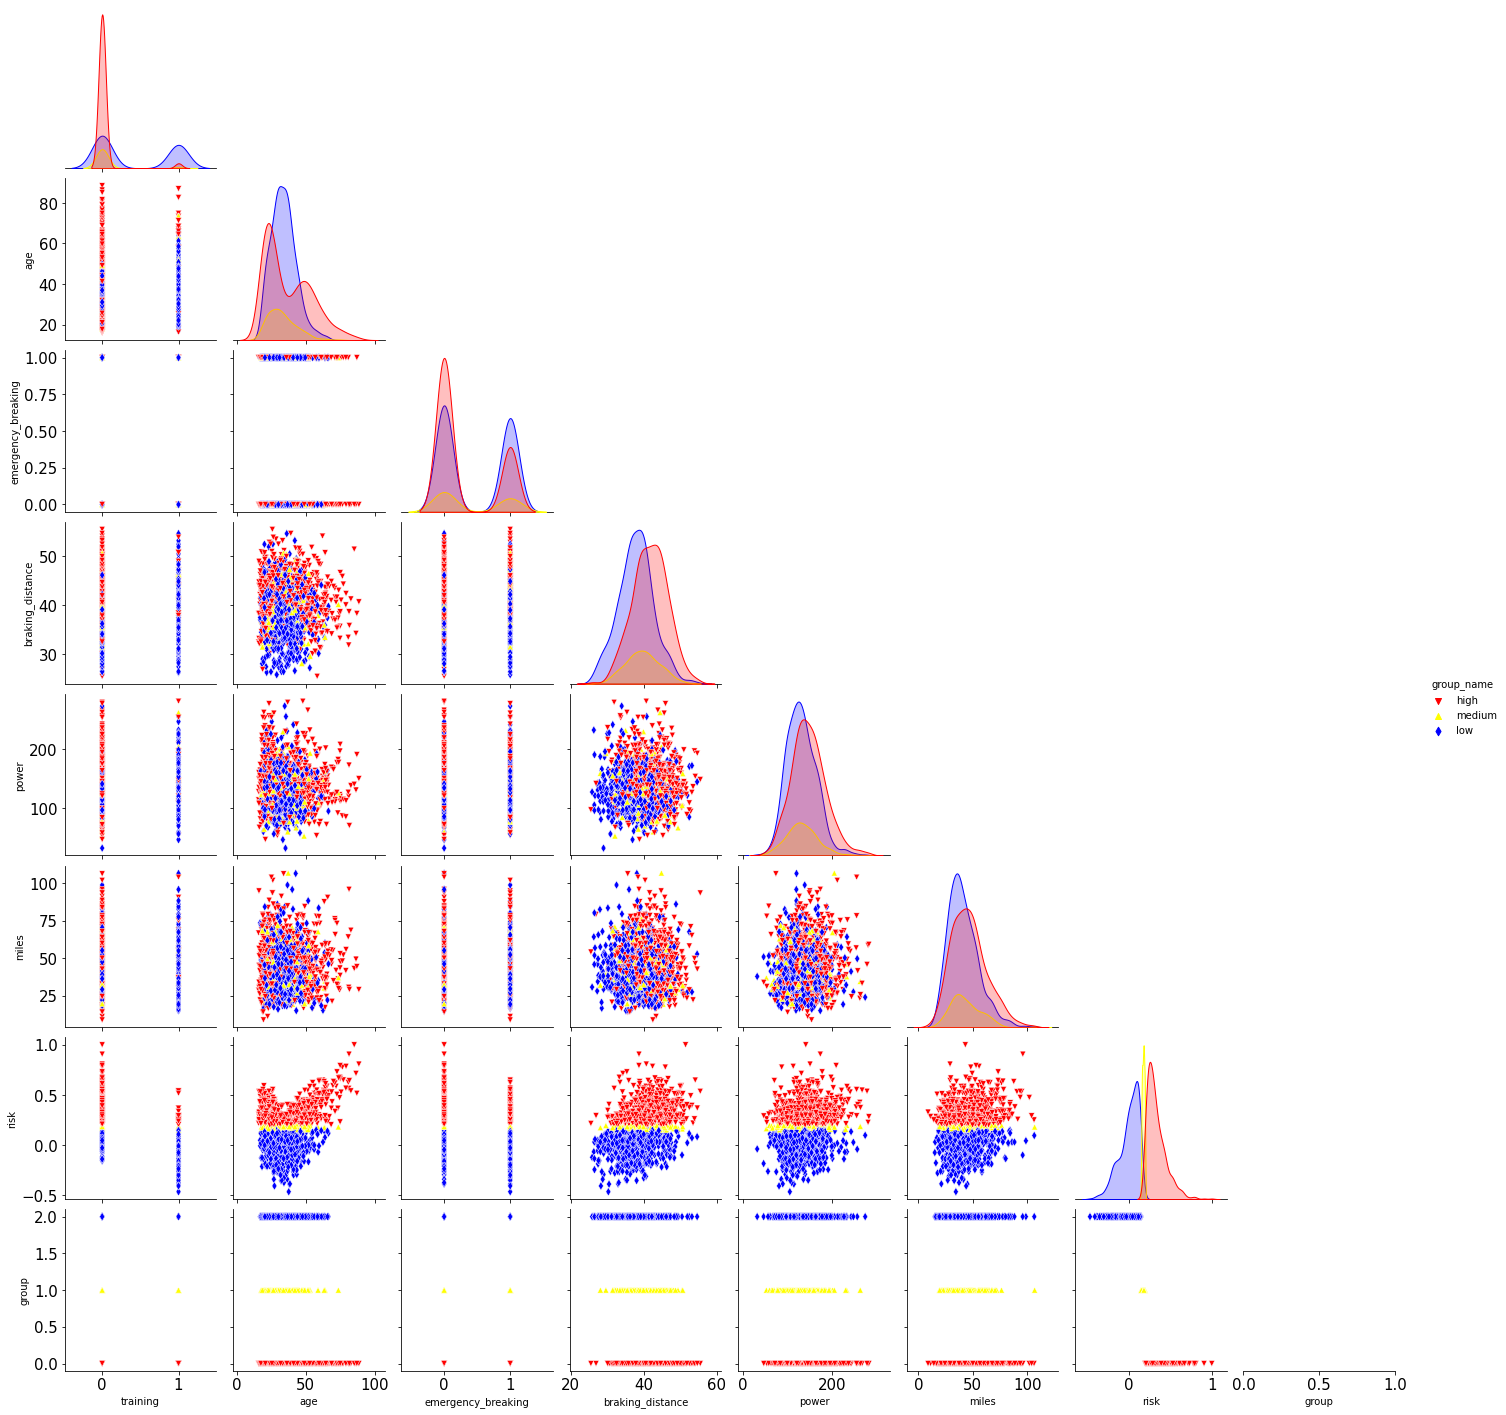

In [98]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

# sns.pairplot(preprocessed_data, hue='group',  kind="kde";
 
sns.pairplot(preprocessed_data, 
             kind="scatter", 
             diag_kind="kde",
             corner=True, 
             hue='group_name',
             hue_order = ['high', 'medium', 'low'],
             palette=colors, 
             markers=markers);


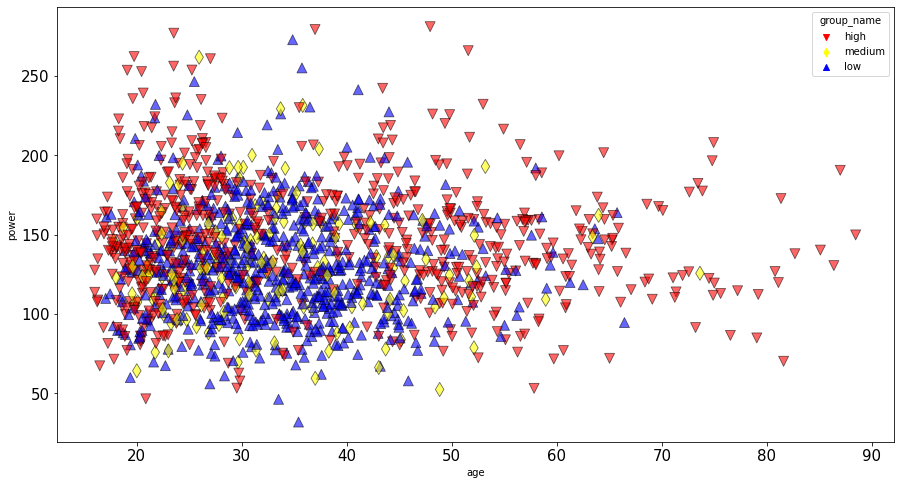

In [99]:
sns.scatterplot(preprocessed_data['age'], 
                preprocessed_data['power'], 
                hue=preprocessed_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=preprocessed_data['group_name'],
                style_order = ['high', 'medium', 'low'],
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

In [100]:
file_name = './model-based-1.csv'
preprocessed_data.to_csv(file_name, index=False, sep=';')

In [101]:
!ls -l

total 2892
-rw-r--r-- 1 olli olli 2799354 Jul 28 19:14 generate-causal.ipynb
-rw-r--r-- 1 olli olli  156247 Jul 28 19:15 model-based-1.csv


In [102]:
customers = pd.read_csv(file_name, sep=';')
customers.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000
mean,0.207333,35.243806,0.384667,39.728535,137.524885,43.766704,0.166877,1.000
std,0.405532,13.193059,0.486679,5.108156,36.527189,15.274232,0.193100,0.949
min,0.000000,16.000000,0.000000,25.502431,31.956980,8.911590,-0.466816,0.000
25%,0.000000,24.971581,0.000000,36.261921,112.369662,32.597446,0.043358,0.000
50%,0.000000,32.511926,0.000000,39.697162,134.053456,41.697948,0.174823,1.000
75%,0.000000,43.043168,1.000000,43.284010,160.117914,52.330167,0.285449,2.000
max,1.000000,88.456666,1.000000,55.491497,281.197004,106.746630,1.000000,2.000


# Story: Assistant systems get more and more important, bringing down weight on driver ability and bringen up breaking systems over time 
* influence on driver ability can not be measured in input
* but inputs like age and assistant system

In [103]:
def generate_risk_data(driver_weight = 4.0, 
                       emergency_breaking_fraction = 0.40,
                       age_drift = 0,
                       miles_drift = 0,
                       n_samples=1_500, 
                       seed=42,
#                        apply_norm=True,
                       apply_norm=False,
                       low_risk_threshold = 1.0,
                       high_risk_threshold = 3.0,
                      low_risk_quantile=.3333,
                      high_risk_quantile=.6666):
    risk_model = StructuralCausalModel({
        "training": lambda n_samples: np.random.binomial(1, p=0.20, size=n_samples), 
    #     "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100).astype(int),
        "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100) \
            + np.random.normal(age_drift, scale=0.1, size=n_samples),
        "driver_ability": \
            lambda training, age, n_samples: 
                np.random.normal(loc=training - \
                                 # all deviation from good age is negative
                                 # using unskwed mean makes this a bit more balanaced
                                 abs(age - age_skewed_mean) / age_std, \
                                 scale=0.1),
        "emergency_breaking": lambda n_samples: np.random.binomial(1, p=emergency_breaking_fraction, size=n_samples), 
        "braking_distance": lambda n_samples: np.random.normal(loc=braking_distance_mean, scale=braking_distance_std, size=n_samples),
        "power": lambda n_samples: skewnorm.rvs(a=2, loc=power_mean, scale=power_std, size=n_samples),
        "car_safety": \
            lambda emergency_breaking, braking_distance, power, n_samples: \
                np.random.normal(loc=emergency_breaking - \
                                 # having a breaking distance below average is negative, so we have to subtract
                                 (braking_distance - braking_distance_mean) / braking_distance_std - \
                                 # all deviation from good amount of power is negative
                                 abs(power - power_mean) / power_std, \
                                 scale=0.1),
        "miles": lambda n_samples: skewnorm.rvs(a=4, loc=miles_mean, scale=miles_std, size=n_samples) \
            + np.random.normal(miles_drift, scale=1, size=n_samples),
        "risk": \
            lambda driver_ability, car_safety, miles, n_samples:
                    # negative score is high risk
                    # driver is overall more important than car
                 - np.random.normal(loc=\
                                 driver_ability * driver_weight\
                                 + car_safety
                                 # all deviation from good miles is negative
                                 - abs(miles - miles_mean) / miles_std, \
                                 scale=0.1)})
    np.random.seed(seed)
    data = risk_model.sample(n_samples=n_samples)
    
    preprocessed_data = data[features]
    # preprocessed_data = data.copy()
    if apply_norm:
        preprocessed_data['risk'] = normalize(preprocessed_data['risk'].values.reshape(-1, 1), axis=0, norm='max')
    preprocessed_data['group_name'] = 'medium'
    preprocessed_data['group'] = YELLOW
    
    if low_risk_threshold is None:
        low_risk_threshold = preprocessed_data['risk'].quantile(low_risk_quantile)
        high_risk_threshold = preprocessed_data['risk'].quantile(high_risk_quantile)

    preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] < low_risk_threshold, 'low', preprocessed_data['group_name'])
    preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] > high_risk_threshold, 'high', preprocessed_data['group_name'])

    preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'low', GREEN, preprocessed_data['group'])
    preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'high', RED, preprocessed_data['group'])
    
    return preprocessed_data


In [104]:
generated_data = generate_risk_data()
generated_data.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.207333,35.240226,0.370000,40.047327,134.393736,44.008394,2.248003,0.908000
std,0.405532,13.191571,0.482965,5.292310,33.410677,15.975945,2.624384,0.822184
min,0.000000,16.019190,0.000000,20.816722,45.272791,10.593720,-6.887889,0.000000
25%,0.000000,24.948022,0.000000,36.440032,110.333073,32.391855,0.599228,0.000000
50%,0.000000,32.462481,0.000000,39.922413,132.423028,41.390346,2.350790,1.000000
75%,0.000000,43.078459,1.000000,43.675832,155.296864,53.115684,3.924291,2.000000
max,1.000000,88.425701,1.000000,57.645276,257.983238,108.381185,12.290948,2.000000


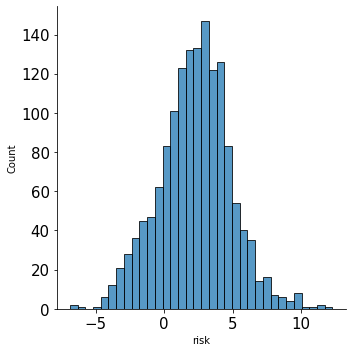

In [105]:
sns.displot(generated_data["risk"]);

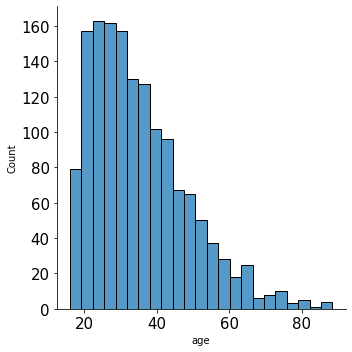

In [106]:
sns.displot(generated_data["age"]);

In [107]:
np.unique(generated_data['group_name'], return_counts=True)

(array(['high', 'low', 'medium'], dtype=object), array([582, 444, 474]))

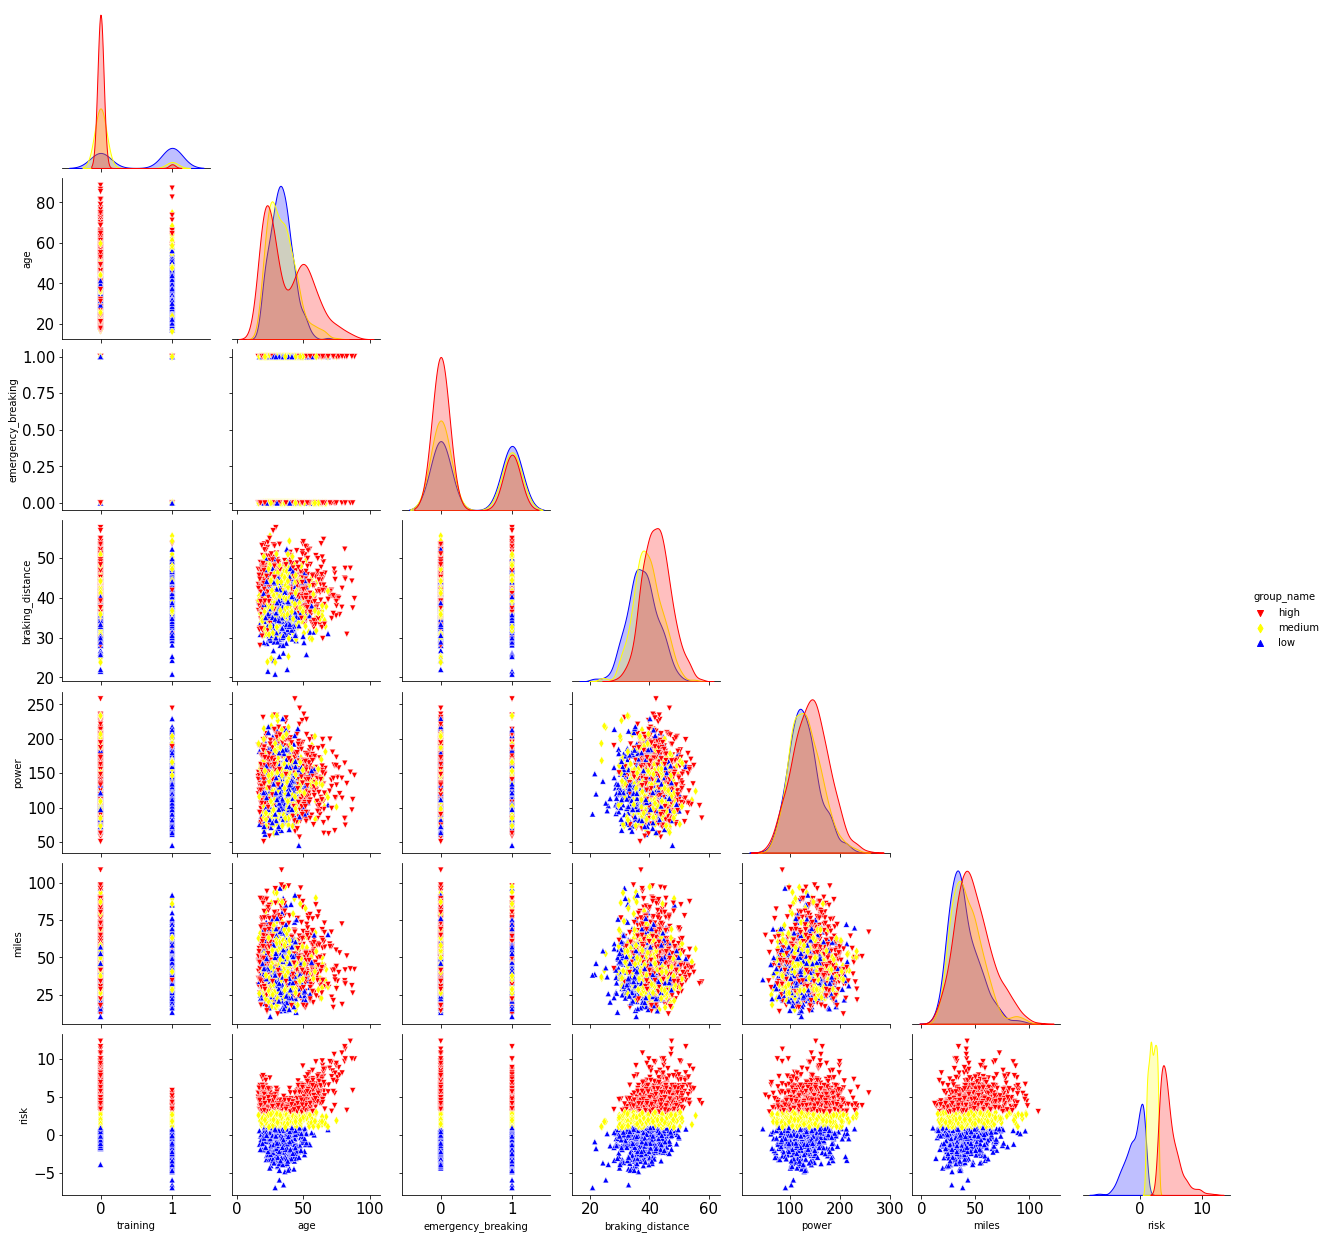

In [108]:
sns.pairplot(generated_data, 
             kind="scatter", 
             diag_kind="kde",
             corner=True, 
             hue='group_name',
             hue_order = ['high', 'medium', 'low'],
             palette=colors, 
             markers=markers,
             vars=features);

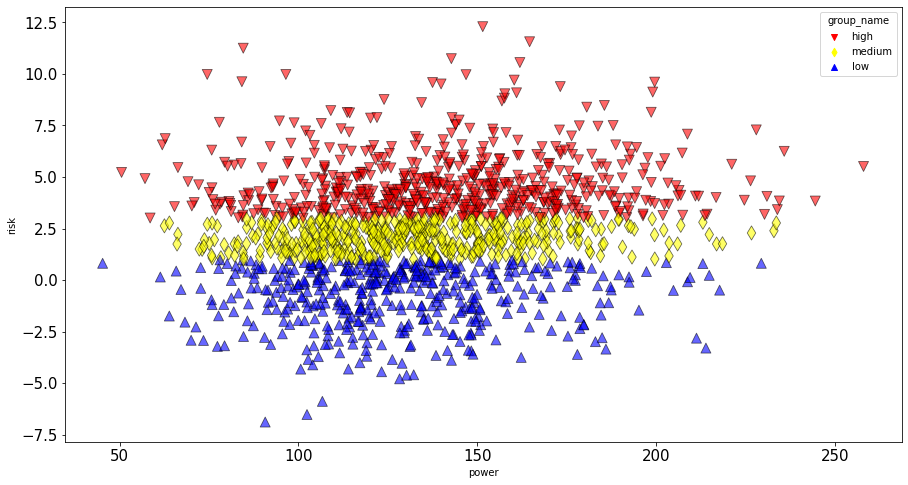

In [109]:
sns.scatterplot(generated_data['power'], 
                generated_data['risk'], 
                hue=generated_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=generated_data['group_name'], 
                style_order = ['high', 'medium', 'low'],
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

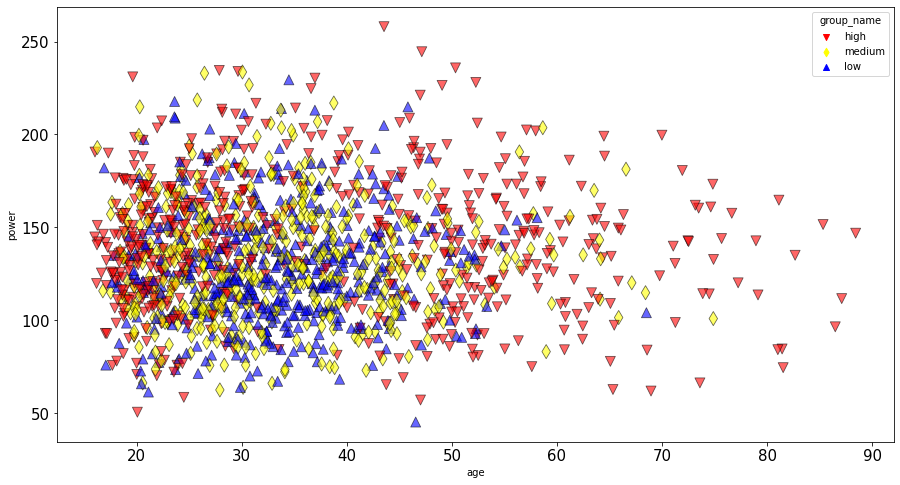

In [110]:
sns.scatterplot(generated_data['age'], 
                generated_data['power'], 
                hue=generated_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=generated_data['group_name'], 
                style_order = ['high', 'medium', 'low'],
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

In [111]:
gen_1 = generated_data

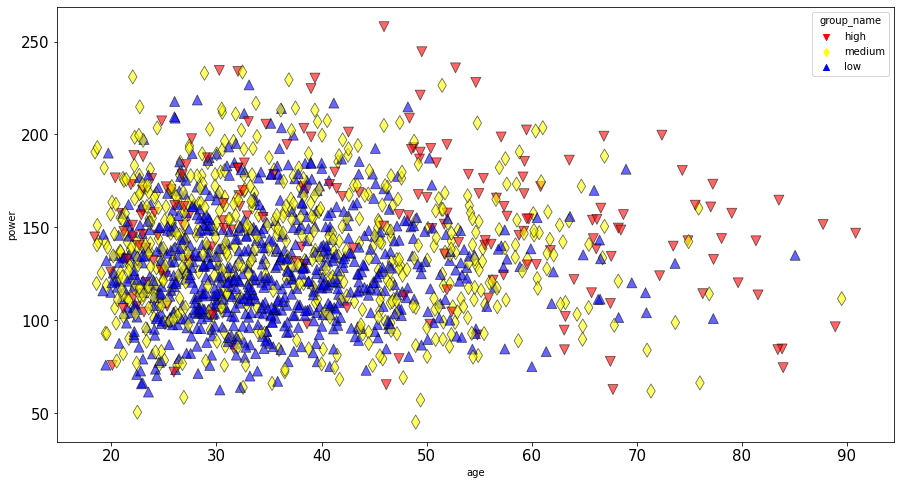

In [112]:
iteration = 24

generated_data = generate_risk_data(driver_weight = 4.0 - iteration * 0.1,
                                    age_drift = iteration * 0.1,
                                    emergency_breaking_fraction = 0.40 + iteration * 0.02)
sns.scatterplot(generated_data['age'], 
                generated_data['power'], 
                hue=generated_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=generated_data['group_name'], 
                style_order = ['high', 'medium', 'low'],
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

In [113]:
np.unique(generated_data['group_name'], return_counts=True)

(array(['high', 'low', 'medium'], dtype=object), array([179, 729, 592]))

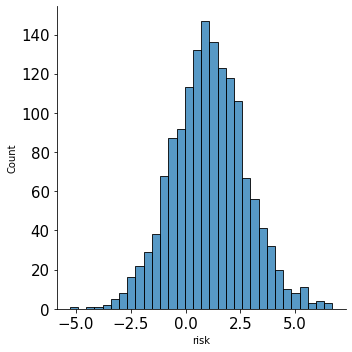

In [114]:
sns.displot(generated_data["risk"]);

In [115]:
generated_data.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.207333,37.640226,0.890667,40.047327,134.393736,44.008394,1.083023,1.366667
std,0.405532,13.191571,0.312161,5.292310,33.410677,15.975945,1.678108,0.686442
min,0.000000,18.419190,0.000000,20.816722,45.272791,10.593720,-5.283096,0.000000
25%,0.000000,27.348022,1.000000,36.440032,110.333073,32.391855,-0.023230,1.000000
50%,0.000000,34.862481,1.000000,39.922413,132.423028,41.390346,1.064631,1.000000
75%,0.000000,45.478459,1.000000,43.675832,155.296864,53.115684,2.148727,2.000000
max,1.000000,90.825701,1.000000,57.645276,257.983238,108.381185,6.704938,2.000000


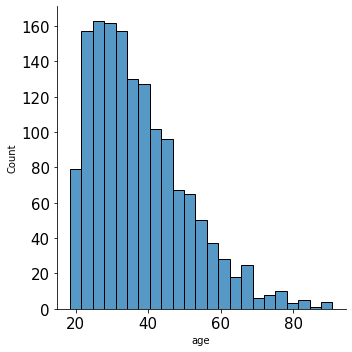

In [116]:
sns.displot(generated_data["age"]);

In [117]:
generated_data["age"].describe()

count    1500.000000
mean       37.640226
std        13.191571
min        18.419190
25%        27.348022
50%        34.862481
75%        45.478459
max        90.825701
Name: age, dtype: float64

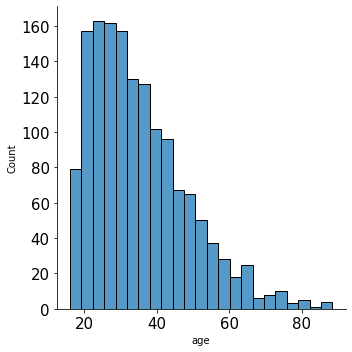

In [118]:
sns.displot(gen_1["age"]);

In [119]:
gen_1["age"].describe()

count    1500.000000
mean       35.240226
std        13.191571
min        16.019190
25%        24.948022
50%        32.462481
75%        43.078459
max        88.425701
Name: age, dtype: float64

# Investigating Drift
* https://evidentlyai.com/blog/data-drift-detection-large-datasets


In [120]:
import evidently

In [121]:
from evidently.analyzers.stattests.jensenshannon import jensenshannon_stat_test
from evidently.analyzers.stattests.kl_div import kl_div_stat_test
from evidently.analyzers.stattests.ks_stattest import ks_stat_test
from evidently.analyzers.stattests.psi import psi_stat_test
from evidently.analyzers.stattests.wasserstein_distance_norm import wasserstein_stat_test

In [122]:
# if the above fails
# !pip install --upgrade --force-reinstall evidently

In [123]:
def generate_aged_data(iteration):
    assert iteration <= 36
    generated_data = generate_risk_data(driver_weight = 4.0 - iteration * 0.1,
                                        age_drift = iteration * 0.1,
                                        miles_drift = - iteration * 1,
                                        seed=iteration,
                                        emergency_breaking_fraction = 0.40 + iteration * 0.015)
    return generated_data

## Age does drift 

In [124]:
# ks and wasserstein drift shortly after 10

In [125]:
# does not drift
# iteration = 12
# drifted
iteration = 13
generated_data = generate_aged_data(iteration)
wasserstein_stat_test(gen_1["age"], generated_data["age"], 'num', threshold=None)

StatTestResult(drift_score=0.1191385291393408, drifted=True, actual_threshold=0.1)

In [126]:
# does not drift
# iteration = 10
# drifted
iteration = 11
generated_data = generate_aged_data(iteration)
ks_stat_test(gen_1["age"], generated_data["age"], 'num', threshold=None)

StatTestResult(drift_score=0.0037657665795975317, drifted=True, actual_threshold=0.05)

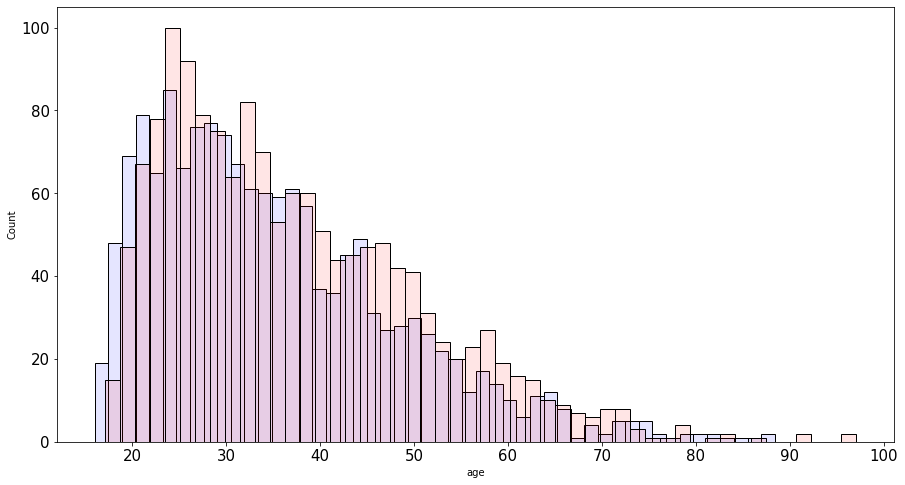

In [127]:
sns.histplot(gen_1["age"], color='blue', bins=50, alpha=0.1);
sns.histplot(generated_data["age"], color='red', bins=50, alpha=0.1);

## Investigating more features

In [128]:
gen_1.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.207333,35.240226,0.370000,40.047327,134.393736,44.008394,2.248003,0.908000
std,0.405532,13.191571,0.482965,5.292310,33.410677,15.975945,2.624384,0.822184
min,0.000000,16.019190,0.000000,20.816722,45.272791,10.593720,-6.887889,0.000000
25%,0.000000,24.948022,0.000000,36.440032,110.333073,32.391855,0.599228,0.000000
50%,0.000000,32.462481,0.000000,39.922413,132.423028,41.390346,2.350790,1.000000
75%,0.000000,43.078459,1.000000,43.675832,155.296864,53.115684,3.924291,2.000000
max,1.000000,88.425701,1.000000,57.645276,257.983238,108.381185,12.290948,2.000000


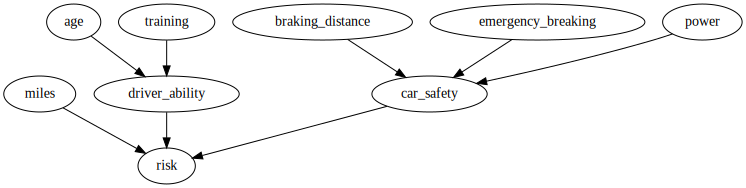

In [129]:
risk_model.cgm.draw()

## Emergy breaking feature also does drift

In [130]:
# does not drift
# iteration = 8
# drifted
iteration = 9
generated_data = generate_aged_data(iteration)
jensenshannon_stat_test(gen_1["emergency_breaking"], generated_data["emergency_breaking"], 'cat', threshold=None)

StatTestResult(drift_score=0.10317547784755317, drifted=True, actual_threshold=0.1)

## Miles drifts very quickly, people drive less

* JS and PSI seem less sensitive and need a clearer drift
* we might also increase the threshold

In [131]:
# KS and Wasserstein detect drift
iteration = 2
# JS and PSI detect drift
iteration = 5
generated_data = generate_aged_data(iteration)

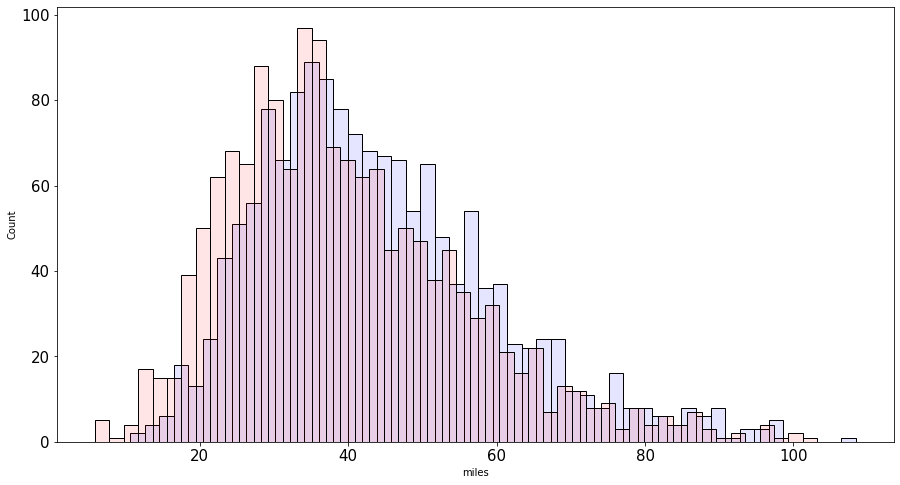

In [132]:
sns.histplot(gen_1["miles"], color='blue', bins=50, alpha=0.1);
sns.histplot(generated_data["miles"], color='red', bins=50, alpha=0.1);

In [133]:
wasserstein_stat_test(gen_1["miles"], generated_data["miles"], 'num', threshold=None)

StatTestResult(drift_score=0.2789016041643943, drifted=True, actual_threshold=0.1)

In [134]:
ks_stat_test(gen_1["miles"], generated_data["miles"], 'num', threshold=None)

StatTestResult(drift_score=3.090354424855524e-11, drifted=True, actual_threshold=0.05)

In [135]:
jensenshannon_stat_test(gen_1["miles"], generated_data["miles"], 'num', threshold=None)

StatTestResult(drift_score=0.12223628266411908, drifted=True, actual_threshold=0.1)

In [136]:
psi_stat_test(gen_1["miles"], generated_data["miles"], 'num', threshold=None)

StatTestResult(drift_score=0.12690035648101639, drifted=True, actual_threshold=0.1)

## Breaking distance does not drift, we only have slight statistical variations

In [137]:
iteration = 36
generated_data = generate_aged_data(iteration)

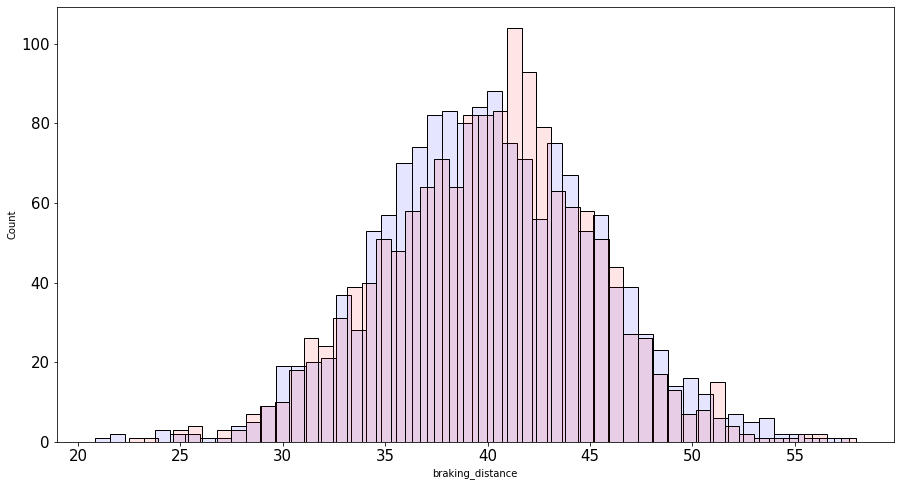

In [138]:
sns.histplot(gen_1["braking_distance"], color='blue', bins=50, alpha=0.1);
sns.histplot(generated_data["braking_distance"], color='red', bins=50, alpha=0.1);

In [139]:
wasserstein_stat_test(gen_1["braking_distance"], generated_data["braking_distance"], 'num', threshold=None)

StatTestResult(drift_score=0.0619686940147264, drifted=False, actual_threshold=0.1)

In [140]:
ks_stat_test(gen_1["braking_distance"], generated_data["braking_distance"], 'num', threshold=None)

StatTestResult(drift_score=0.19626576377865276, drifted=False, actual_threshold=0.05)

In [141]:
jensenshannon_stat_test(gen_1["braking_distance"], generated_data["braking_distance"], 'num', threshold=None)

StatTestResult(drift_score=0.06621168610254012, drifted=False, actual_threshold=0.1)

In [142]:
psi_stat_test(gen_1["braking_distance"], generated_data["braking_distance"], 'num', threshold=None)

StatTestResult(drift_score=0.035779956097353585, drifted=False, actual_threshold=0.1)